In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix

dataset = pd.read_csv("merged_matches.csv", index_col=0)

columns_for_ML = {
    'goals_diff': (dataset['h_goals']-dataset['a_goals']),
    'total_shots_diff': (dataset['h_total_shots']-dataset['a_total_shots']),
    'shots_on_target_diff': (dataset['h_shots_on_target']-dataset['a_shots_on_target']),
    'goals_on_penalty_diff': (dataset['h_goals_on_penalty']-dataset['a_goals_on_penalty']),
    'total_penalties_diff': (dataset['h_total_penalties']-dataset['a_total_penalties']),
    'completed_passings_diff': (dataset['h_completed_passings']-dataset['a_completed_passings']),
    'total_passings_diff': (dataset['h_total_passings']-dataset['a_total_passings']),
    'corners_diff': (dataset['h_corners']-dataset['a_corners']), 
    'fouls_diff': (dataset['h_fouls']-dataset['a_fouls']), 
    'yellow_cards_diff': (dataset['h_yellow_cards']-dataset['a_yellow_cards']), 
    'red_cards_diff': (dataset['h_red_cards']-dataset['a_red_cards']), 
    'percentage_possession_diff': (dataset['h_percentage_possession']-dataset['a_percentage_possession']),
    #'risultato': dataset[['Risultato']].replace(['V','P','N'],[0,1,2])
}


results = dataset[['Risultato']].replace(['V','P','N'],[0,1,2])
dataset = dataset.drop(['Risultato'], axis=1)

for key, value in columns_for_ML.items():
    dataset[key] = value

dataset.head()

teams = dataset['h_team'].drop_duplicates()
teams.values

home_teams = [name+'_h' for name in teams.values]
away_teams = [name+'_a' for name in teams.values]

dataset_ML = dataset[[k for k in columns_for_ML.keys()]]

In [24]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset_ML, results, test_size=0.2, stratify = results)

from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf=RandomForestClassifier(n_estimators=100) 

rf.fit(X_test, y_test['Risultato'].to_numpy())

preds = rf.predict(X_test)

In [25]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))


Accuracy: 1.0


## Decision tree classifier

In [55]:
dataset = pd.read_csv("merged_matches.csv", index_col=0)
dataset['Risultato'] = dataset[['Risultato']].replace(['V','P','N'],[0,1,2])

In [56]:
dataset = dataset.drop(columns=['h_team', 'a_team', 'h_goals', 'a_goals'])

In [57]:
features = [x for x in dataset.columns if x != 'Risultato']
X, y = dataset[features], dataset.Risultato.values

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [60]:
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

In [61]:
y_hat

array([2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 1, 1, 0])

In [62]:
import matplotlib.pyplot as plt
from sklearn import tree

In [63]:
print(list(enumerate(features)))
#fig, ax = plt.subplots(figsize=(8,6))
#tree.plot_tree(dt, ax=ax)
#plt.tight_layout()
#plt.savefig('/Users/alfio/Teaching/2020-21/inforet/lectures/imgs/dtree.png')
#plt.show()


[(0, 'h_total_shots'), (1, 'h_shots_on_target'), (2, 'h_goals_on_penalty'), (3, 'h_total_penalties'), (4, 'h_completed_passings'), (5, 'h_total_passings'), (6, 'h_corners'), (7, 'h_percentage_possession'), (8, 'h_fouls'), (9, 'h_yellow_cards'), (10, 'h_red_cards'), (11, 'a_total_shots'), (12, 'a_shots_on_target'), (13, 'a_goals_on_penalty'), (14, 'a_total_penalties'), (15, 'a_corners'), (16, 'a_yellow_cards'), (17, 'a_red_cards'), (18, 'a_fouls'), (19, 'a_completed_passings'), (20, 'a_total_passings'), (21, 'a_percentage_possession')]


In [64]:
import sklearn.metrics as mtr
import warnings
warnings.filterwarnings('ignore')

In [65]:
cm = mtr.confusion_matrix(y_test, y_hat)

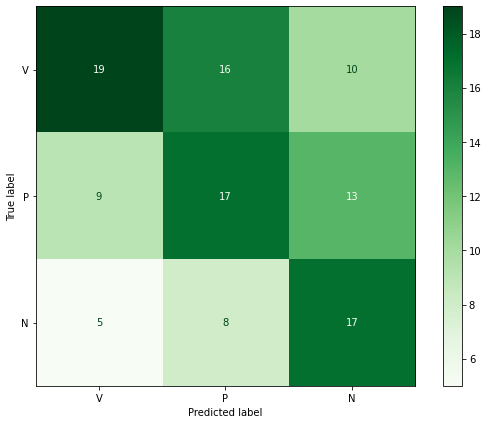

In [66]:
d = mtr.ConfusionMatrixDisplay(cm, ['V', 'P', 'N'])
fig, ax = plt.subplots(figsize=(8,6))
d.plot(ax=ax, cmap='Greens')
plt.tight_layout()
plt.show()